In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [3]:
# function to concat the data
def concat_data(positive_file_name, negative_file_name):
    df_positive = pd.read_csv(positive_file_name)
    df_negative = pd.read_csv(negative_file_name)
    # Concatenate the data
    n_rows = df_positive.shape[0]
    df_negative_sampled = df_negative.sample(n=n_rows, random_state=42)
    df_combine = pd.concat([df_positive, df_negative_sampled])
    return df_combine

In [4]:
df_train = concat_data("2022_TP_total.csv", "2022_FP_total.csv")

In [5]:
df_test = concat_data("2021_TP_total.csv", "2021_FP_total.csv")

In [6]:
# function to preprocess the data
def preprocess_data(df):
    df["lightning"] = (df["lightning"] > 0).astype(int)
    df["v10"] = df["v10"].abs()
    df["u10"] = df["u10"].abs()
    df = df.drop(["time", "valid_time", "local_time", "season"], axis=1)

    # Drop columns which names contain '60'
    df = df.loc[:, ~df.columns.str.contains("60")]

    # Drop all columns which names contain 'after', except it contains 'shsr' AND 'after'
    cols_contains_after = df.filter(regex="after").columns
    cols_shsr_after = df.filter(regex="SHSR.*after").columns
    cols_to_drop = [col for col in cols_contains_after if col not in cols_shsr_after]
    df = df.drop(columns=cols_to_drop)

    # 填充 NaN 值，这里以均值为例
    df.fillna(df.mean(), inplace=True)
    return df

In [7]:
df_train=preprocess_data(df_train)
df_test=preprocess_data(df_test)

In [8]:
# only keep SHSR related columns
def keep_shsr_columns(df):
    for col in df.columns:
        if "SHSR" not in col and col != "lightning":
            df = df.drop(col, axis=1)
    return df

In [9]:
df_train = keep_shsr_columns(df_train)
df_test = keep_shsr_columns(df_test)

In [10]:
Y_train = df_train["lightning"]
Y_test = df_test["lightning"]

In [11]:
X_train = df_train.drop("lightning", axis=1)
X_test = df_test.drop("lightning", axis=1)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)

# 创建逻辑回归模型
model = LogisticRegression()

# 训练模型
model.fit(X_train, Y_train)

# 预测测试集
Y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# 计算精确度
precision = precision_score(Y_test, Y_pred)
print("Precision:", precision)

# 计算召回率
recall = recall_score(Y_test, Y_pred)
print("Recall:", recall)

# 计算F1-score
f1 = f1_score(Y_test, Y_pred)
print("F1 Score:", f1)

# plot the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(cm)

# 计算混淆矩阵
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()

# 计算FAR (False Acceptance Rate)
far = fp / (fp + tn)
print("False Acceptance Rate (FAR):", far)

# 计算POD (Probability of Detection)
pod = tp / (tp + fn)
print("Probability of Detection (POD):", pod)

/Users/maxyxf/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7789167554493363
Precision: 0.7948352055476869
Recall: 0.7964418487750204
F1 Score: 0.7956377160824616
Confusion Matrix:
[[363142 115739]
 [114601 448388]]
False Acceptance Rate (FAR): 0.24168634796536093
Probability of Detection (POD): 0.7964418487750204


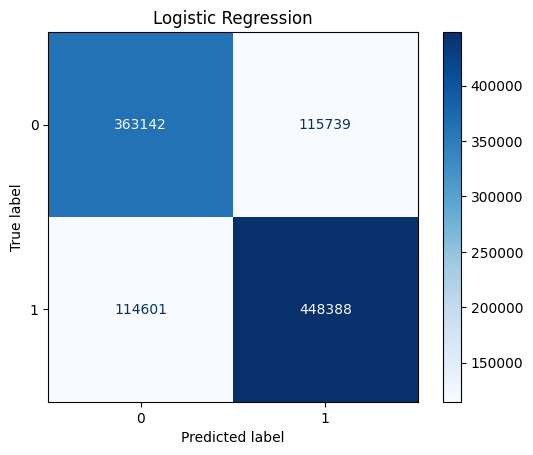

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Logistic Regression")  # Adding a title
plt.show()  # This will display the plot with the title